In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("ipl_data.csv")
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [2]:
df.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [4]:
df.shape

(76014, 15)

In [5]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [6]:
# remove unwanted columns
# keep consistent teams
# remove first 5 overs score
# convert date column to datetime obj

In [7]:
columns_to_remove = ["mid", "venue", "batsman", "bowler", "striker", "non-striker"]
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [8]:
df.shape

(76014, 9)

In [9]:
df["bat_team"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [10]:
consistent_teams = [
    "Kolkata Knight Riders",
    "Chennai Super Kings",
    "Rajasthan Royals",
    "Mumbai Indians",
    "Kings XI Punjab",
    "Royal Challengers Bangalore",
    "Delhi Daredevils",
    "Sunrisers Hyderabad",
]

In [11]:
df = df[
    (df["bat_team"].isin(consistent_teams)) & (df["bowl_team"].isin(consistent_teams))
]

In [12]:
df.shape

(53811, 9)

In [13]:
df = df[df["overs"] > 5.0]
df.shape

(40088, 9)

In [14]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40088 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40088 non-null  datetime64[ns]
 1   bat_team        40088 non-null  object        
 2   bowl_team       40088 non-null  object        
 3   runs            40088 non-null  int64         
 4   wickets         40088 non-null  int64         
 5   overs           40088 non-null  float64       
 6   runs_last_5     40088 non-null  int64         
 7   wickets_last_5  40088 non-null  int64         
 8   total           40088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 3.1+ MB


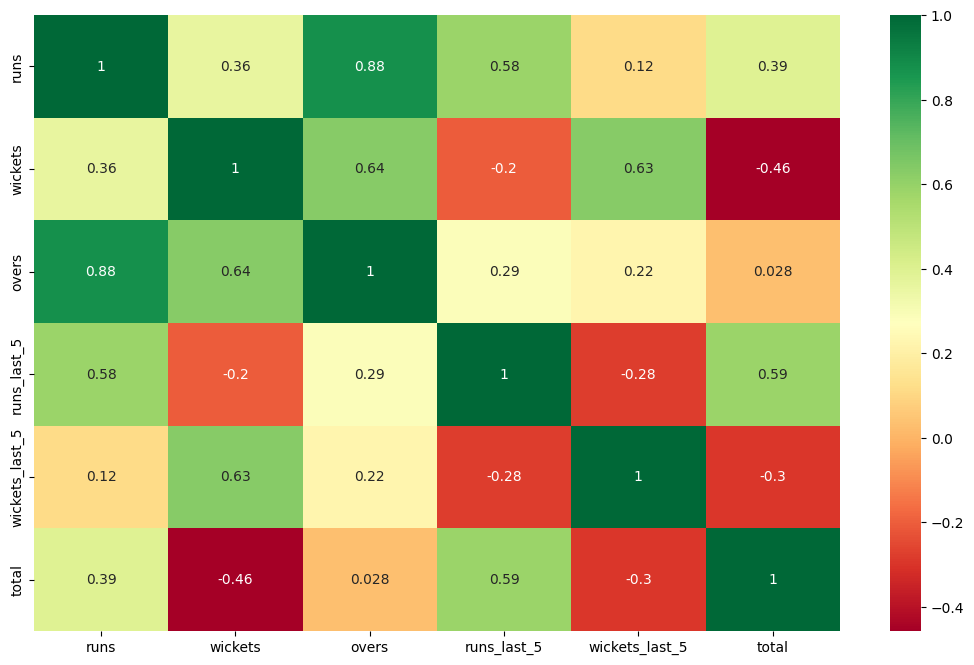

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)
top_corr_features = corr_matrix.index
plt.figure(figsize=(13, 8))
g = sns.heatmap(
    data=df[top_corr_features].corr(numeric_only=True), annot=True, cmap="RdYlGn"
)

In [17]:
# data Preprocessing techniques
# Handling categorical features

In [18]:
# to convert categorical features into numerical features
# OneHotEncoding

In [19]:
encoded_df = pd.get_dummies(data=df, columns=["bat_team", "bowl_team"])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [20]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [21]:
from sklearn.model_selection import train_test_split

X_train = encoded_df.drop(labels="total", axis=1)[encoded_df["date"].dt.year <= 2016]
X_test = encoded_df.drop(labels="total", axis=1)[encoded_df["date"].dt.year >= 2017]
y_train = encoded_df[encoded_df["date"].dt.year <= 2016]["total"].values
y_test = encoded_df[encoded_df["date"].dt.year >= 2017]["total"].values
# remove date column
X_train.drop(labels="date", axis=True, inplace=True)
X_test.drop(labels="date", axis=True, inplace=True)

In [22]:
X_train.shape

(37310, 21)

In [23]:
X_test.shape

(2778, 21)

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
y_pred_lr

array([172.06180006, 175.20980011, 174.60646893, ..., 100.37312829,
        99.80361698,  93.14218986])

In [25]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train, y_train)
y_pred_dtr = model_dtr.predict(X_test)

In [26]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)

In [27]:
def predict_score(
    batting_team="Chennai Super Kings",
    bowling_team="Mumbai Indians",
    overs=5.1,
    runs=50,
    wickets=0,
    runs_in_prev_5=50,
    wickets_in_prev_5=0,
):
    temp_array = list()

    # Batting Team
    if batting_team == "Chennai Super Kings":
        temp_array = temp_array + [1, 0, 0, 0, 0, 0, 0, 0]
    elif batting_team == "Delhi Daredevils":
        temp_array = temp_array + [0, 1, 0, 0, 0, 0, 0, 0]
    elif batting_team == "Kings XI Punjab":
        temp_array = temp_array + [0, 0, 1, 0, 0, 0, 0, 0]
    elif batting_team == "Kolkata Knight Riders":
        temp_array = temp_array + [0, 0, 0, 1, 0, 0, 0, 0]
    elif batting_team == "Mumbai Indians":
        temp_array = temp_array + [0, 0, 0, 0, 1, 0, 0, 0]
    elif batting_team == "Rajasthan Royals":
        temp_array = temp_array + [0, 0, 0, 0, 0, 1, 0, 0]
    elif batting_team == "Royal Challengers Bangalore":
        temp_array = temp_array + [0, 0, 0, 0, 0, 0, 1, 0]
    elif batting_team == "Sunrisers Hyderabad":
        temp_array = temp_array + [0, 0, 0, 0, 0, 0, 0, 1]

    # Bowling Team
    if bowling_team == "Chennai Super Kings":
        temp_array = temp_array + [1, 0, 0, 0, 0, 0, 0, 0]
    elif bowling_team == "Delhi Daredevils":
        temp_array = temp_array + [0, 1, 0, 0, 0, 0, 0, 0]
    elif bowling_team == "Kings XI Punjab":
        temp_array = temp_array + [0, 0, 1, 0, 0, 0, 0, 0]
    elif bowling_team == "Kolkata Knight Riders":
        temp_array = temp_array + [0, 0, 0, 1, 0, 0, 0, 0]
    elif bowling_team == "Mumbai Indians":
        temp_array = temp_array + [0, 0, 0, 0, 1, 0, 0, 0]
    elif bowling_team == "Rajasthan Royals":
        temp_array = temp_array + [0, 0, 0, 0, 0, 1, 0, 0]
    elif bowling_team == "Royal Challengers Bangalore":
        temp_array = temp_array + [0, 0, 0, 0, 0, 0, 1, 0]
    elif bowling_team == "Sunrisers Hyderabad":
        temp_array = temp_array + [0, 0, 0, 0, 0, 0, 0, 1]

    # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
    temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

    # Converting into numpy array
    temp_array = np.array([temp_array])

    # Prediction
    return int(model.predict(temp_array)[0])

In [28]:
final_score = predict_score(
    batting_team="Chennai Super Kings",
    bowling_team="Mumbai Indians",
    overs=10.0,
    runs=80,
    wickets=1,
    runs_in_prev_5=50,
    wickets_in_prev_5=1,
)
print(
    "The final predicted score (range): {} to {}".format(
        final_score - 10, final_score + 5
    )
)

The final predicted score (range): 173 to 188


c:\Users\desktop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
# For RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae 
mae_ = mae(y_pred=y_pred_rfr, y_true=y_test)
print(mae_)

13.711525917926565


In [36]:
# For DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae 
mae_ = mae(y_pred=y_pred_dtr, y_true=y_test)
print(mae_)

16.596832253419727


In [37]:
# For LinearRegressor
from sklearn.metrics import mean_absolute_error as mae 
mae_ = mae(y_pred=y_pred_lr, y_true=y_test)
print(mae_)

12.118024556233074
